# CAMPUS PLACEMENT ANALYSIS

## Importing Project Dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Importing our data set

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Now that we have our data, we will try and look for null values in our data. We will use the describe() method to find the mean of different columns and some other data that might help us in making our model.

In [4]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

We only have null values in salary column, for now we will keep it and try and see whhat whether we need it as a feature or not. If needed, we will fill these null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


We will try and visualise our data in order to find the right features to train our models on. We have a lot of columns, so let's try and compare with the variable that we need to predict i.e the status, whether a candidate is placed or not.

Text(0.5, 1.0, 'Distribution of Males and Females in our Data')

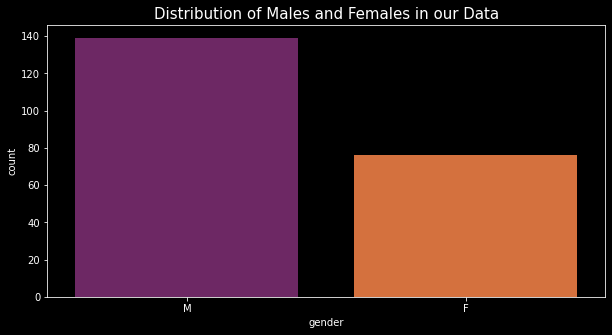

In [7]:
plt.style.use('dark_background') 
plt.figure(figsize=(10,5))
sns.countplot('gender',data = df,palette = 'inferno')
plt.title("Distribution of Males and Females in our Data",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Boards the Students belong to in 10th')

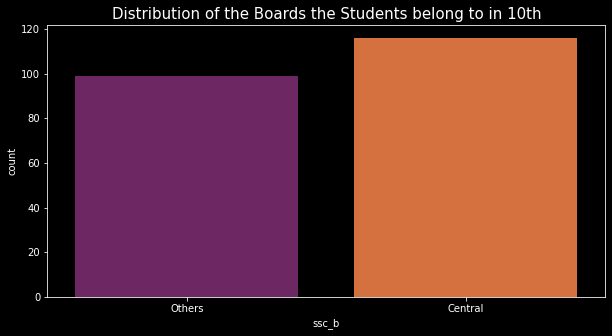

In [8]:
plt.figure(figsize=(10,5))
sns.countplot('ssc_b',data = df,palette = 'inferno')
plt.title("Distribution of the Boards the Students belong to in 10th",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Boards the Students belong to in 10th')

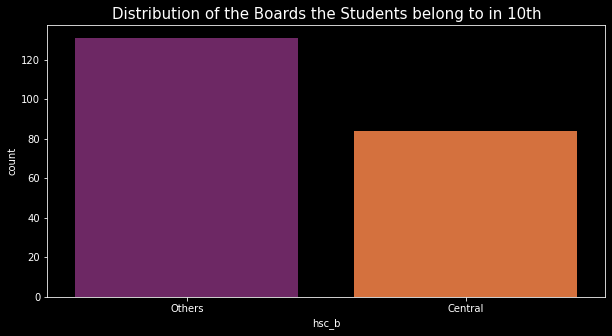

In [9]:
plt.figure(figsize=(10,5))
sns.countplot('hsc_b',data = df,palette = 'inferno')
plt.title("Distribution of the Boards the Students belong to in 10th",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Streams that students chose in High school')

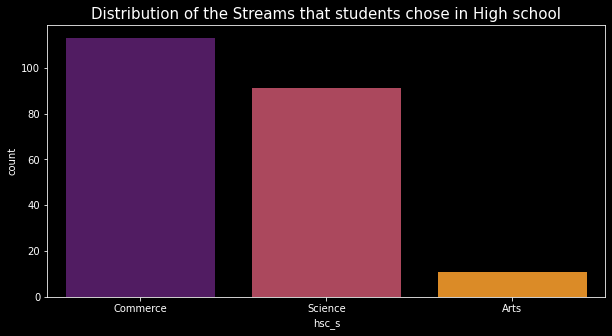

In [10]:
plt.figure(figsize=(10,5))
sns.countplot('hsc_s',data = df,palette = 'inferno')
plt.title("Distribution of the Streams that students chose in High school",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Type of Degrees')

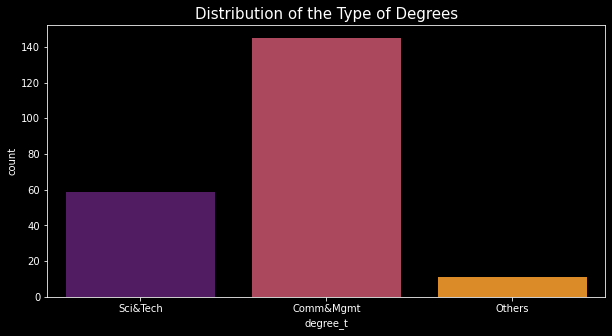

In [11]:
plt.figure(figsize=(10,5))
sns.countplot('degree_t',data = df,palette = 'inferno')
plt.title("Distribution of the Type of Degrees",fontsize = 15)

Text(0.5, 1.0, 'Distribution of how many students have prior work experience')

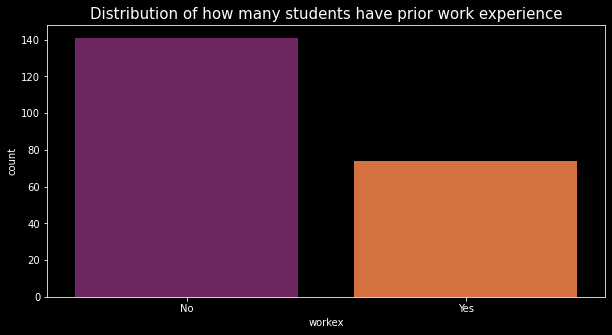

In [12]:
plt.figure(figsize=(10,5))
sns.countplot('workex',data = df,palette = 'inferno')
plt.title("Distribution of how many students have prior work experience",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Types of Specialisation')

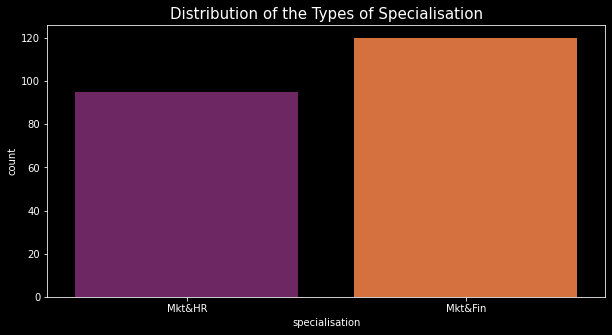

In [13]:
plt.figure(figsize=(10,5))
sns.countplot('specialisation',data = df,palette = 'inferno')
plt.title("Distribution of the Types of Specialisation",fontsize = 15)

Text(0.5, 1.0, 'Distribution of the Placements')

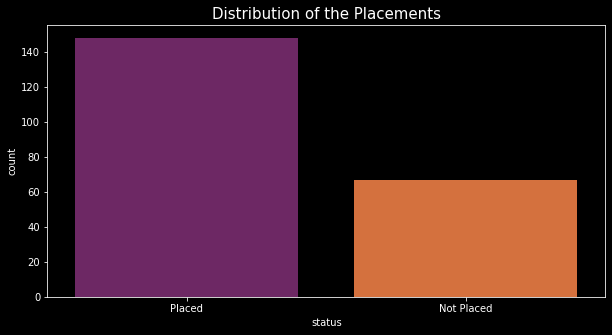

In [14]:
plt.figure(figsize=(10,5))
sns.countplot('status',data = df,palette = 'inferno')
plt.title("Distribution of the Placements",fontsize = 15)

Text(0.5, 1.0, 'Distribution of Placements in Males and Females')

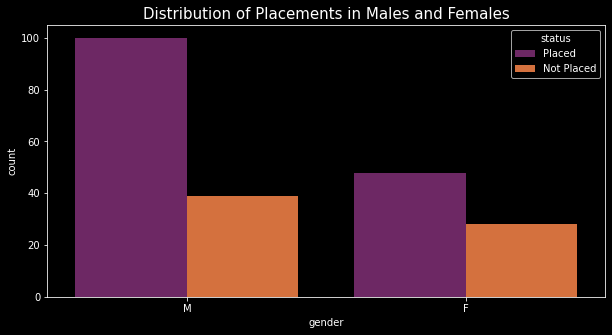

In [15]:
plt.figure(figsize=(10,5))
sns.countplot('gender',data = df,palette = 'inferno',hue = 'status')
plt.title("Distribution of Placements in Males and Females",fontsize = 15)

Text(0.5, 1.0, 'Distribution of Placements in Males and Females')

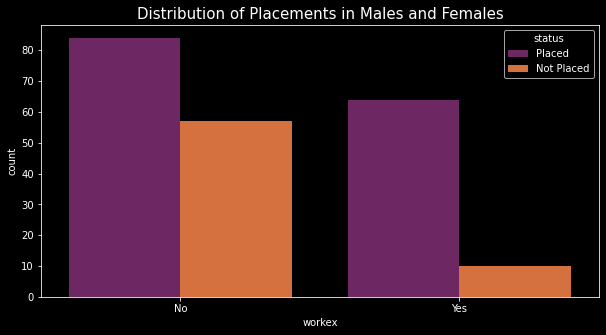

In [16]:
plt.figure(figsize=(10,5))
sns.countplot('workex',data = df,palette = 'inferno',hue = 'status')
plt.title("Distribution of Placements in Males and Females",fontsize = 15)

Text(0.5, 1.0, "Relation between the Student's Boards and their score during their Secondary education")

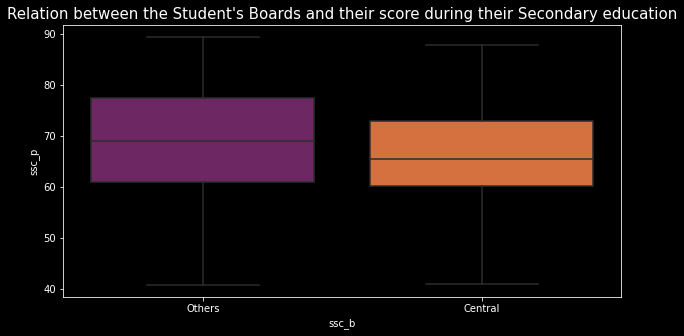

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot('ssc_b','ssc_p',data = df,palette = 'inferno')
plt.title("Relation between the Student's Boards and their score during their Secondary education",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot('status','ssc_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their score during their Secondary education",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot('hsc_b','hsc_p',data = df,palette = 'inferno')
plt.title("Relation between the Student's Boards and their score in High school",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot('status','hsc_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their score in High school",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot('status','mba_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their score during MBA",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('ssc_b',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the Students that were placed and the boards that they were in during Secondary Education",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('hsc_b',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the Students that were placed and the boards that they were in High School",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot('status','degree_p',data = df,palette = 'inferno')
plt.title("Relation between the Students that were placed and their degree percentage",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('hsc_s',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the streams that students chose in highschool and their placement",fontsize = 15)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('degree_t',data = df,palette = 'inferno',hue = 'status')
plt.title("Relation between the degree types that students chose and their placement",fontsize = 15)

In [ ]:
#df.head()

Now that we know what each column looks like, we can start to select our features that we will feed our model. We will make a copy of the original data frame in order to be safe if anything goes wrong.

In [18]:
df1 = df.copy()

We will drop the sl_no and salary column as they wont help us in any way. The salary also has null values so dropping it means we dint have to impute these values and it won't help us in predicting if a person gets placed or not.

In [19]:
df1.drop(['sl_no','salary'],axis = 1,inplace = True)

In [20]:
df1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


We have values in the columns that are strings. In order to train our model, we need to convert these strings to numbers in order to feed it to the model.

In [23]:
df1['status']= df1['status'].map({'Placed':1,'Not Placed':0})
df1['workex']= df1['workex'].map({'Yes':1,'No':0})
df1['gender']= df1['gender'].map({'M':1,'F':0})
df1['hsc_b']= df1['hsc_b'].map({'Central':1,'Others':0})
df1['ssc_b']= df1['ssc_b'].map({'Central':1,'Others':0})
df1['degree_t']= df1['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
df1['specialisation'] = df1['specialisation'].map({'Mkt&HR':1, 'Mkt&Fin':0})
df1['hsc_s']= df1['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2})

In [24]:
df1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,0,58.00,0,0,55.0,1,58.80,1
1,1,79.33,1,78.33,0,1,77.48,0,1,86.5,0,66.28,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.0,0,57.80,1
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,1,59.43,0
4,1,85.80,1,73.60,1,0,73.30,1,0,96.8,0,55.50,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

We won't use all of these values. We will use the 'ssc_p','hsc_p','degree_p','workex','mba_p','etest_p','gender','degree_t' and 'specialisation' column as our features to predict whether a candidate will be placed or not.

In [26]:
X = df1[['ssc_p','hsc_p','degree_p','workex','mba_p','etest_p','gender','degree_t','specialisation']]
y = df1['status']

Now that we have our features, we will split them and into training and testing sets and we will also scale down our features in order to have better results.

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Our goal is to predict whether a candidate will be placed or not. This is a classification problem so we will use Logistic regression, KNN and SVM and compare how these perform individually.

## Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [36]:
print("Accuracy:",accuracy_score(y_test, pred)*100)
print("Precision:",precision_score(y_test, pred)*100)
print("Recall:",recall_score(y_test, pred)*100)

Accuracy: 88.37209302325581
Precision: 89.28571428571429
Recall: 92.5925925925926


In [38]:
# Saving the model as an .pkl file
import pickle
pickle_out = open("LRModel.pkl", "wb")
pickle.dump(lr, pickle_out)
pickle_out.close()

In [ ]:
user_input1 = [[67.00,91.00,58.00,0,58.80,55.00,1,0,1]]
user_pred1 = lr.predict(user_input1)
if user_pred1 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, prediction)*100)
print("Precision:",precision_score(y_test, prediction)*100)
print("Recall:",recall_score(y_test, prediction)*100)

In [ ]:
user_input2 = [[67.00,91.00,58.00,0,58.80,55.00,1,0,1]]
user_pred2 = knn.predict(user_input2)
if user_pred1 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

## Optimizing KNN

In [ ]:
error = []
for i in  range(1,100):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error)
plt.title('K-values')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=20)
knn1.fit(X_train,y_train)
prediction1 = knn1.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, prediction1)*100)
print("Precision:",precision_score(y_test, prediction1)*100)
print("Recall:",recall_score(y_test, prediction1)*100)

In [ ]:
user_input3 = [[67.00,91.00,58.00,0,58.80,55.00,1,0,1]]
user_pred3 = knn1.predict(user_input1)
if user_pred3 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, svc_pred)*100)
print("Precision:",precision_score(y_test, svc_pred)*100)
print("Recall:",recall_score(y_test, svc_pred)*100)

## Optimizing SVM with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, grid_pred)*100)
print("Precision:",precision_score(y_test, grid_pred)*100)
print("Recall:",recall_score(y_test, grid_pred)*100)

In [ ]:
user_input4 = [[56.00,52.00,52.00,0,59.43,66.00,1,0,1]]
user_pred4 = grid.predict(user_input4)
if user_pred4 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate won't be Placed :(")

## Random Forest:

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfModel = RandomForestClassifier()

In [31]:
rfModel.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
forestPredict = rfModel.predict(X_test)

In [34]:
print("Accuracy:",accuracy_score(y_test, forestPredict)*100)
print("Precision:",precision_score(y_test, forestPredict)*100)
print("Recall:",recall_score(y_test, forestPredict)*100)

Accuracy: 83.72093023255815
Precision: 83.33333333333334
Recall: 92.5925925925926


## Result
---
The Result that we got aren't veru great at the moment. We were able to predict whether a person will be placed or not using the data in the table but the results aren't very great. It could be better by including some other feature or by reducing the number of features. This model still has some scope for improvement. But we could see that Logistic Regression performed better than both KNN and SVM. So atleast we have an idea which model would give us the better results.